Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")




In [2]:
df = pd.read_csv('data\exams.csv')

In [3]:
df.head 


<bound method NDFrame.head of      gender race/ethnicity parental level of education         lunch  \
0      male        group A                 high school      standard   
1    female        group D            some high school  free/reduced   
2      male        group E                some college  free/reduced   
3      male        group B                 high school      standard   
4      male        group E          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                 high school      standard   
996    male        group D          associate's degree  free/reduced   
997  female        group C            some high school  free/reduced   
998  female        group C                some college      standard   
999    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
0                 completed      

In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()
# There are no missing values in the dataset.

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.drop_duplicates(inplace=True)
# Dropped 1 duplicate row from the dataset.

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       999 non-null    object
 1   race/ethnicity               999 non-null    object
 2   parental level of education  999 non-null    object
 3   lunch                        999 non-null    object
 4   test preparation course      999 non-null    object
 5   math score                   999 non-null    int64 
 6   reading score                999 non-null    int64 
 7   writing score                999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


In [6]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  73
writing score                  76
dtype: int64

In [15]:
df.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.362362,68.970971,67.705706
std,15.373794,14.711935,15.575322
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.000000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [8]:
print("categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())
print("categories in 'race/ethnicity' variable: ")
print(df['race/ethnicity'].unique())
print(" categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())


categories in 'gender' variable:   ['male' 'female']
categories in 'race/ethnicity' variable: 
['group A' 'group D' 'group E' 'group B' 'group C']
 categories in 'parental level of education' variable:  ['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]


In [19]:
numerical_features = [f for f in df.columns if df[f].dtype != 'object']
categorical_features = [f for f in df.columns if df[f].dtype == 'object']
print("we have {} Numerical Features".format(len(numerical_features)) )
print("Categorical Features: ", categorical_features)    



we have 3 Numerical Features
Categorical Features:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [20]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55


In [62]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['avg_score'] = df['total_score'] / 3
print(df['total_score'])



0      197
1      154
2      169
3      223
4      219
      ... 
995    208
996    268
997    108
998    229
999    187
Name: total_score, Length: 1000, dtype: int64


In [63]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,male,group A,high school,standard,completed,67,67,63,197,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,154,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,169,56.333333
3,male,group B,high school,standard,none,77,78,68,223,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,219,73.000000


In [41]:
full_reading_score = df['reading score'] == 100
print(full_reading_score.sum())

19


In [55]:
full_reading_score = df[df['reading score'] <=20]['avg_score'].count()

less_writing_score=df['writing score']<=20
print(f'less writing score less than 20 number :: {less_writing_score.sum()}')

less writing score less than 20 number :: 0


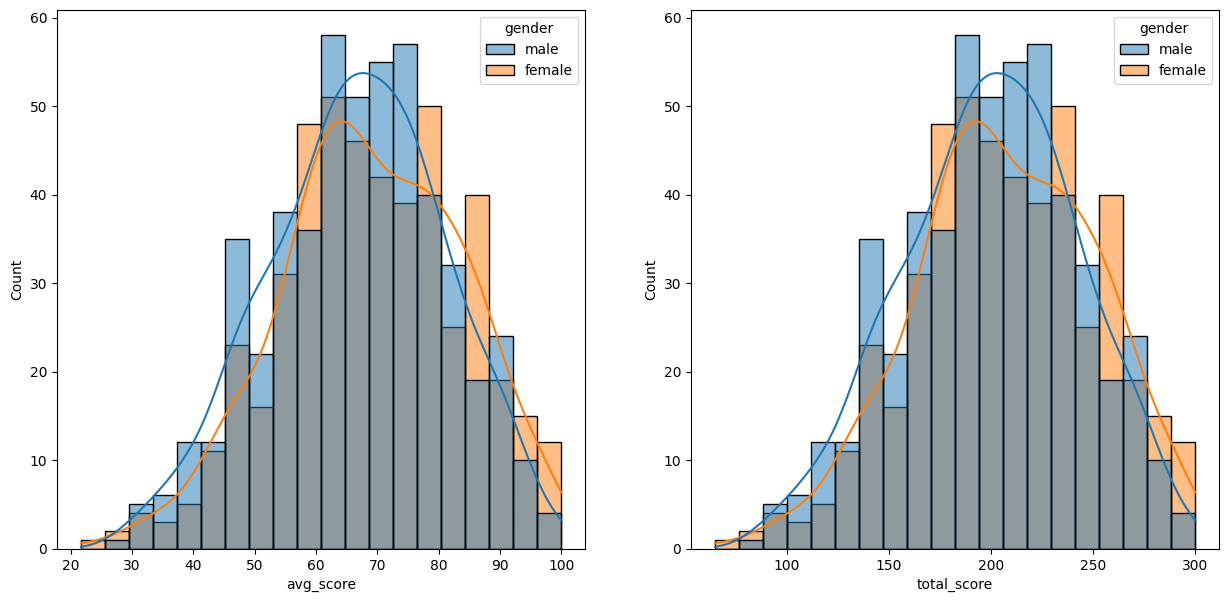

In [79]:
figure, axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='avg_score',bins=20,kde=True,color='g',hue='gender')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=20,kde=True,color='orange',hue='gender')
plt.show()


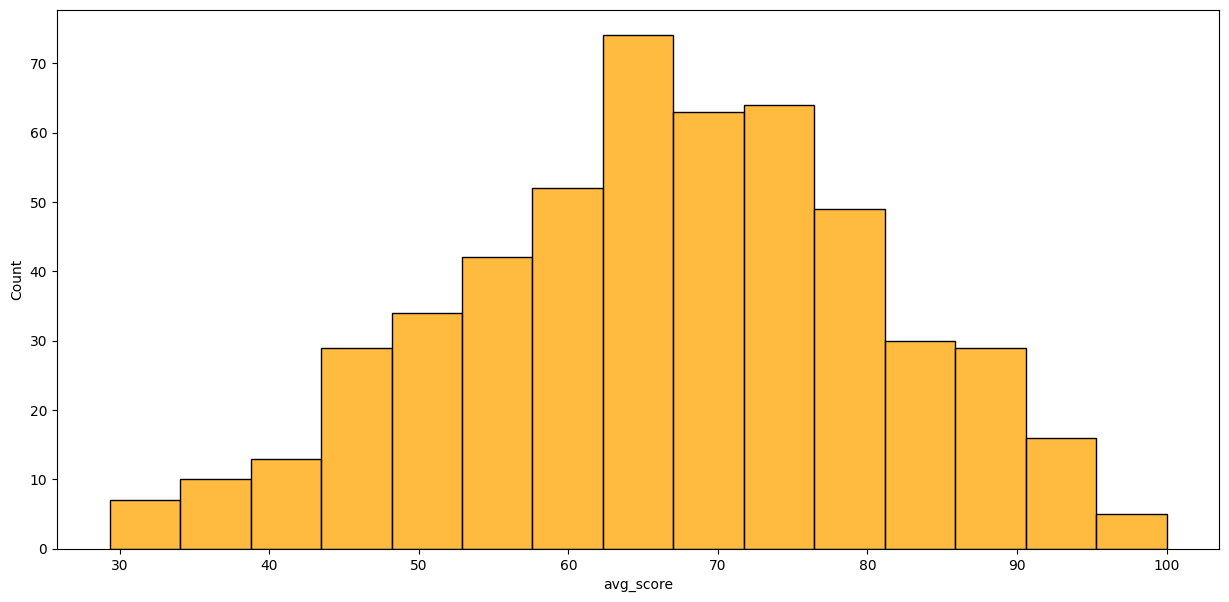

In [90]:
figure = plt.subplots(1,figsize=(15,7))
sns.histplot(data=df[df['gender']=='male'], x='avg_score',color='orange')
plt.show()

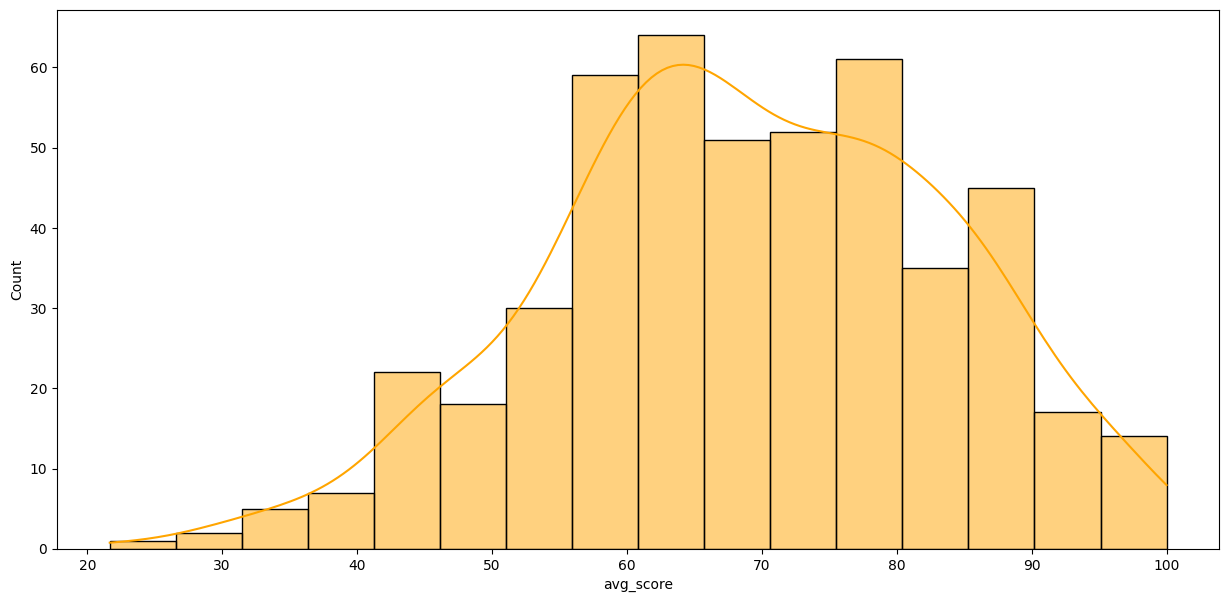

In [92]:
figure = plt.subplots(1,figsize=(15,7))
sns.histplot(data=df[df['gender']=='female'], x='avg_score',kde=True,color='orange')
plt.show()

In [94]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0      male        group A                 high school      standard   
1    female        group D            some high school  free/reduced   
2      male        group E                some college  free/reduced   
3      male        group B                 high school      standard   
4      male        group E          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                 high school      standard   
996    male        group D          associate's degree  free/reduced   
997  female        group C            some high school  free/reduced   
998  female        group C                some college      standard   
999    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  \
0                 completed   

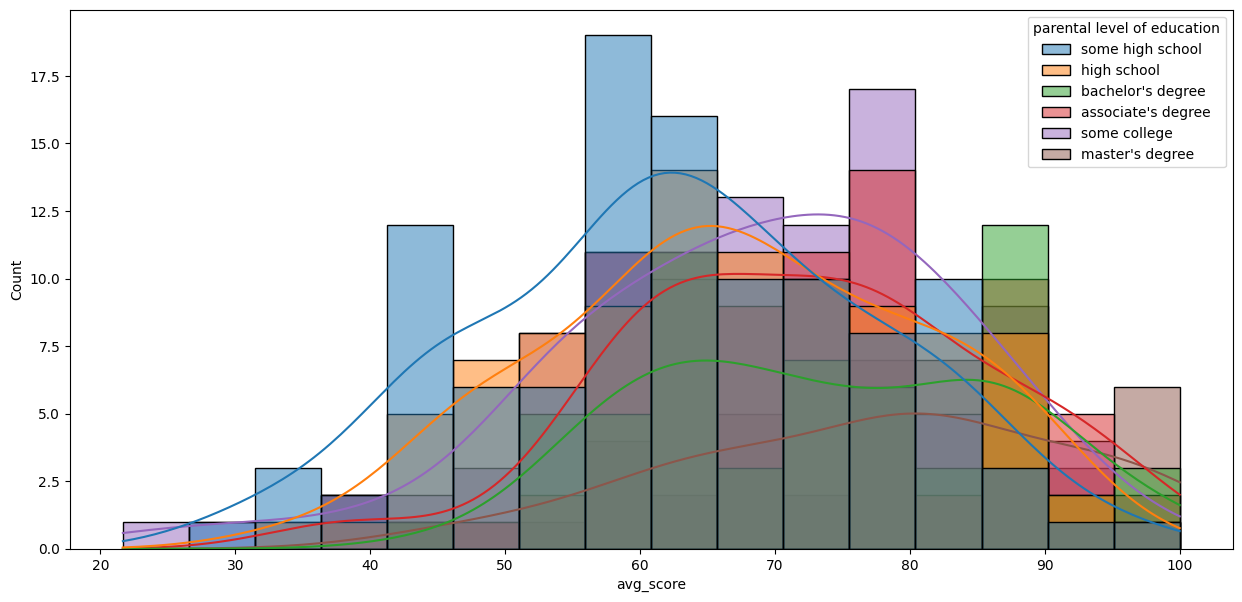

In [95]:
figure = plt.subplots(1,figsize=(15,7))
sns.histplot(data=df[df['gender']=='female'], x='avg_score',kde=True,color='orange',hue='parental level of education')
plt.show()

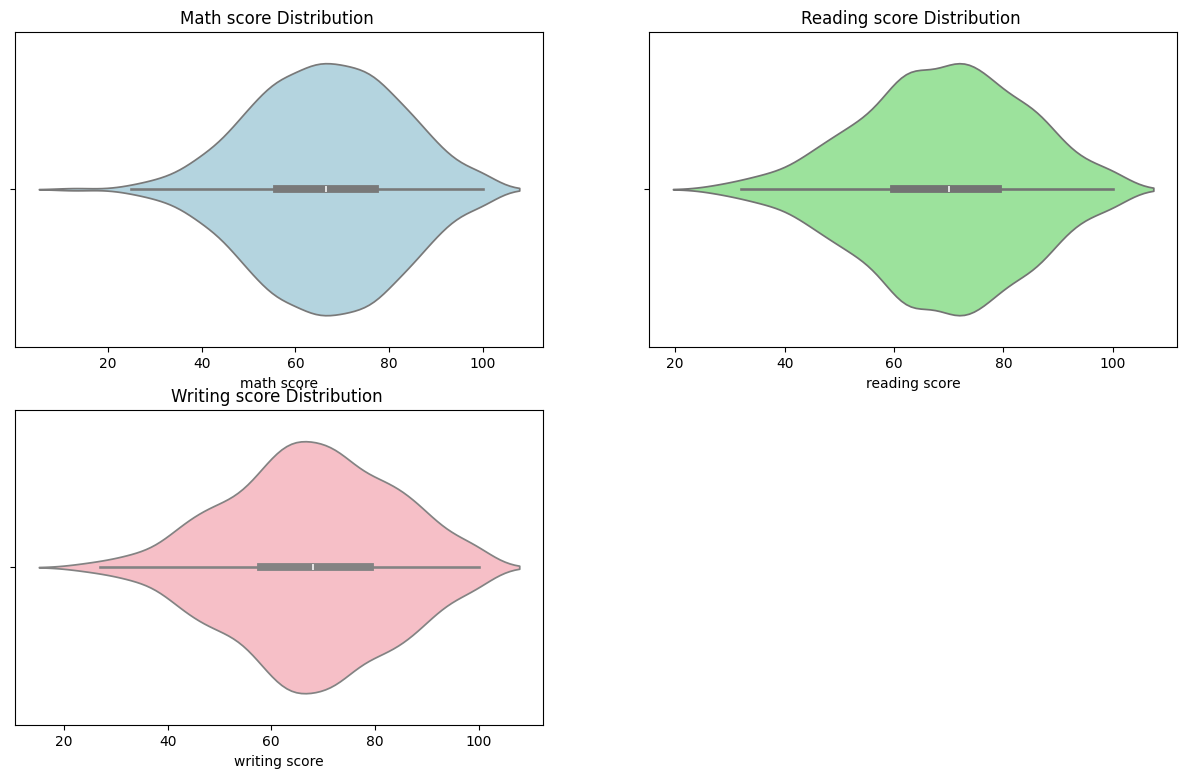

In [96]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.title("Math score Distribution ")
sns.violinplot(data=df, x='math score', color='lightblue')
plt.subplot(2,2,2)
plt.title("Reading score Distribution ")
sns.violinplot(data=df, x='reading score', color='lightgreen')
plt.subplot(2,2,3)
plt.title("Writing score Distribution ")
sns.violinplot(data=df, x='writing score', color='lightpink')
plt.show()  
    